# Topics in Artificial Intelligence (CPSC 532S)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions. Section 4 is designed to introduce you to PyTorch and, more importantly, introduce you to key debugging strategies when dealing with training of neural networks. 

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="http://www.cs.ubc.ca/~lsigal/532S_2022W1/Assignment1/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.49839736 0.49988069 0.50138913]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.50106059 0.49905783 0.50344448]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50091285 0.50079823 0.50201173]
 [0.50243644 0.50079128 0.50274461]]


## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[-0.0005949   0.01006159  0.00422768]
 [-0.01738423 -0.00419335 -0.0001767 ]
 [ 0.00755317  0.01052887 -0.00426482]
 [-0.00373113  0.01904208  0.00014817]]
B = [[ 0.0203445  -0.00391065 -0.02560694]]

x1    = [[1 2 2 3]]
lin   = [[-0.01110591  0.07594823 -0.02981777]]
y_hat = [[0.49722355 0.51897794 0.49254611]]

loss = 0.19229722961311874

dy_hat = [[0.4944471  0.53795587 0.48509222]]
dlin   = [[0.12360796 0.13429522 0.1212461 ]]
dx1    = [[ 0.00179028 -0.0027334   0.00183052  0.00211403]]

dW = [[0.12360796 0.13429522 0.1212461 ]
 [0.24721593 0.26859043 0.24249221]
 [0.24721593 0.26859043 0.24249221]
 [0.37082389 0.40288565 0.36373831]]
dB = [[0.12360796 0.13429522 0.1212461 ]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [17]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -3.1842446   -3.71033938  -5.63099307]
 [ -5.1709955   -6.02533745  -9.14434771]
 [-46.8655487  -54.60858466 -82.87666719]
 [ -7.25300158  -8.45132858 -12.82615087]]

approxGradWeight: [[ -3.1842367   -3.71017197  -5.63099656]
 [ -5.17097465  -6.02489595  -9.14435689]
 [-46.86379397 -54.57229287 -82.87734754]
 [ -7.25296052  -8.45045996 -12.82616884]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [18]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [19]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.50610579
epoch[10] = 1.43445851
epoch[20] = 1.42158596
epoch[30] = 1.41584400
epoch[40] = 1.41296542
epoch[50] = 1.41128973
epoch[60] = 1.41022212
epoch[70] = 1.40949927
epoch[80] = 1.40898469
epoch[90] = 1.40860399
epoch[100] = 1.40831443
epoch[110] = 1.40808973
epoch[120] = 1.40791262
epoch[130] = 1.40777107
epoch[140] = 1.40765644
epoch[150] = 1.40756237
epoch[160] = 1.40748410
epoch[170] = 1.40741808
epoch[180] = 1.40736162
epoch[190] = 1.40731267
epoch[200] = 1.40726966
epoch[210] = 1.40723135
epoch[220] = 1.40719679
epoch[230] = 1.40716522
epoch[240] = 1.40713603
epoch[250] = 1.40710872
epoch[260] = 1.40708288
epoch[270] = 1.40705819
epoch[280] = 1.40703438
epoch[290] = 1.40701121
epoch[300] = 1.40698850
epoch[310] = 1.40696608
epoch[320] = 1.40694382
epoch[330] = 1.40692159
epoch[340] = 1.40689929
epoch[350] = 1.40687682
epoch[360] = 1.40685407
epoch[370] = 1.40683097
epoch[380] = 1.40680740
epoch[390] = 1.40678325


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<br>
<center>
<img src="http://www.cs.ubc.ca/~lsigal/532S_2022W1/Assignment1/2_layer_net.png" width="450">
</center>
<br>


## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [20]:
hidden_state_size = 5
learningRate=0.1
model={}
model['linear']=nn_Linear(4,hidden_state_size)
model['sigmoid']=nn_Sigmoid()
model['loss']=nn_MSECriterion()
model_h={}
model_h['linear']=nn_Linear(hidden_state_size,3)
model_h['sigmoid']=nn_Sigmoid()

for epoch in range(0,400):
    loss=0
    for i in range(0,dataset_size):
        xi=x[i:i+1,:]
        yi=y[i:i+1,:]
        
        # forward
        a0=model['linear'].forward(xi)
        a1=model['sigmoid'].forward(a0)
        a2=model_h['linear'].forward(a1)
        a3=model_h['sigmoid'].forward(a2)
        loss=loss+model['loss'].forward(a3,yi)

        #backward
        da3=model['loss'].backward(a3,yi)
        da2=model_h['sigmoid'].backward(a2,da3)
        da1=model_h['linear'].backward(a1,da2)
        da0=model['sigmoid'].backward(a0,da1)
        model['linear'].backward(xi,da0)

        model_h['linear'].weight=model_h['linear'].weight-learningRate*model_h['linear'].gradWeight
        model_h['linear'].bias=model_h['linear'].bias-learningRate*model_h['linear'].gradBias
        model['linear'].weight=model['linear'].weight-learningRate*model['linear'].gradWeight
        model['linear'].bias=model['linear'].bias-learningRate*model['linear'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))
# Your code goes here.

epoch[0] = 1.54065124
epoch[10] = 1.50892857
epoch[20] = 1.46945383
epoch[30] = 1.44883789
epoch[40] = 1.42909147
epoch[50] = 1.41885204
epoch[60] = 1.41486872
epoch[70] = 1.41266982
epoch[80] = 1.41160595
epoch[90] = 1.41100475
epoch[100] = 1.41059496
epoch[110] = 1.41028426
epoch[120] = 1.41003401
epoch[130] = 1.40982447
epoch[140] = 1.40964406
epoch[150] = 1.40948550
epoch[160] = 1.40934388
epoch[170] = 1.40921574
epoch[180] = 1.40909840
epoch[190] = 1.40898961
epoch[200] = 1.40888742
epoch[210] = 1.40879033
epoch[220] = 1.40869766
epoch[230] = 1.40860994
epoch[240] = 1.40852772
epoch[250] = 1.40844939
epoch[260] = 1.40837133
epoch[270] = 1.40828872
epoch[280] = 1.40819051
epoch[290] = 1.40802781
epoch[300] = 1.40748282
epoch[310] = 1.39883144
epoch[320] = 1.37555191
epoch[330] = 1.36190408
epoch[340] = 1.34480017
epoch[350] = 1.31398941
epoch[360] = 1.30791438
epoch[370] = 1.30566363
epoch[380] = 1.30456078
epoch[390] = 1.30391723


## 2.2. Gradient checking [10 points].
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section 1.4 above.

In [21]:
# Your code goes here.
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear1 = nn_Linear(4, 5)
linear2 = nn_Linear(5,3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
#a0 = linear.forward(x)
#a1 = sigmoid.forward(a0)
#loss = criterion.forward(a1, y) # Loss function.

a0 = linear1.forward(x)
a1 = sigmoid.forward(a0)
a2 = linear2.forward(a1) #linear 
a3 = sigmoid.forward(a2) #sigmoid 
loss = criterion.forward(a3, y) #loss


# Backward-propagation.
#da1 = criterion.backward(a1, y)
#da0 = sigmoid.backward(a0, da1)
#dx = linear.backward(x, da0)

da3 = criterion.backward(a3,y)
da2 = sigmoid.backward(a2,da3)
da1 = linear2.backward(a1, da2)
da0 = sigmoid.backward(a0, da1)
dx = linear1.backward(x, da0)

gradWeight1 = linear1.gradWeight
gradBias1 = linear1.gradBias

gradWeight2=linear2.gradWeight
gradBias2=linear2.gradBias

approxGradWeight1 = np.zeros_like(linear1.weight)
approxGradBias1 = np.zeros_like(linear1.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear1.weight.shape[0]):
    for j in range(0, linear1.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear2.forward(sigmoid.forward(linear1.forward(x)))),y)
        # Loss function.
        # Compute f(w1 + eps)
        shifted_weight_1= np.copy(linear1.weight)
        shifted_weight_1[i, j] = shifted_weight_1[i, j] + epsilon
        shifted_linear1 = nn_Linear(4, 5)
        shifted_linear1.bias = linear1.bias
        shifted_linear1.weight = shifted_weight_1
        fw_epsilon = criterion.forward(sigmoid.forward(linear2.forward(sigmoid.forward(shifted_linear1.forward(x)))),y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight1[i, j] = (fw_epsilon - fw) / epsilon

     #These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight1))
print('\napproxGradWeight: ' + str(approxGradWeight1))

gradWeight: [[-0.02080012 -0.01040428 -0.01174472 -0.01641803  0.00937024]
 [-0.03377798 -0.01689584 -0.01907262 -0.02666177  0.01521662]
 [-0.30613514 -0.1531297  -0.1728582  -0.24163979  0.13791066]
 [-0.04737806 -0.02369864 -0.02675186 -0.03739663  0.02134332]]

approxGradWeight: [[-0.02080049 -0.01040443 -0.01174454 -0.0164181   0.00937028]
 [-0.03377895 -0.01689623 -0.01907214 -0.02666193  0.01521675]
 [-0.30621511 -0.15316166 -0.17281789 -0.24165292  0.13792065]
 [-0.04737998 -0.02369941 -0.0267509  -0.03739695  0.02134356]]


In [22]:
approxGradWeight2 = np.zeros_like(linear2.weight)
approxGradBias2 = np.zeros_like(linear2.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear2.weight.shape[0]):
    for j in range(0, linear2.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear2.forward(sigmoid.forward(linear1.forward(x)))),y)
        # Loss function.
        # Compute f(w1 + eps)
        shifted_weight_2= np.copy(linear2.weight)
        shifted_weight_2[i, j] = shifted_weight_2[i, j] + epsilon
        shifted_linear2 = nn_Linear(5, 3)
        shifted_linear2.bias = linear2.bias
        shifted_linear2.weight = shifted_weight_2
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear2.forward(sigmoid.forward(linear1.forward(x)))),y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight2[i, j] = (fw_epsilon - fw) / epsilon

        # Compute f(w1 + eps)


# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight2))
print('\napproxGradWeight: ' + str(approxGradWeight2))

gradWeight: [[-0.57219898 -0.78413984 -1.01723058]
 [-0.59282531 -0.81240611 -1.05389918]
 [-0.7658584  -1.04953017 -1.36150993]
 [-0.6530084  -0.89488085 -1.16089008]
 [-0.64710837 -0.88679546 -1.15040126]]

approxGradWeight: [[-0.57219786 -0.78413873 -1.01722947]
 [-0.59282411 -0.81240492 -1.05389799]
 [-0.7658564  -1.04952817 -1.36150794]
 [-0.65300695 -0.8948794  -1.16088863]
 [-0.64710694 -0.88679404 -1.15039984]]


## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [23]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(0,x)
    def backward(self, x, gradOutput):
        # Backward pass
        x[x<=0] = 0
        x[x>0] = 0
        return np.multiply(x,gradOutput)
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        return np.tanh(x)
        # Forward pass.
    
    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply(1/np.cosh(x),gradOutput)


## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [24]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        n=len(labels)  # number of example
        return (-1/n)*(np.dot(labels,np.log(predictions))+np.dot((1-labels),np.log(1-predictions)))
        
    def backward(self, predictions, labels):
        n=len(labels)
        tem=np.dot(labels,1/predictions)+np.dot((1-labels),-1/(1-predictions))
        return (-1/n)*tem
        # Backward pass.

<b>Optional</b> [10 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

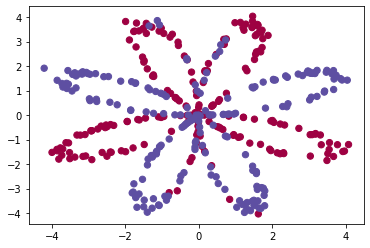

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [26]:
print(X.shape[0])
print(Y.shape)
print(Y.size)
X[:,0:1]

2
(1, 400)
400


array([[1.20444229],
       [3.57611415]])

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09728146
epoch[10] = 0.09935662
epoch[20] = 0.09936244
epoch[30] = 0.09934754
epoch[40] = 0.09926602
epoch[50] = 0.09892327
epoch[60] = 0.09817315
epoch[70] = 0.09724175
epoch[80] = 0.09589014
epoch[90] = 0.09443383
epoch[100] = 0.09332809
epoch[110] = 0.09259587
epoch[120] = 0.09211205
epoch[130] = 0.09177365
epoch[140] = 0.09152052
epoch[150] = 0.09132029
epoch[160] = 0.09115538
epoch[170] = 0.09101571
epoch[180] = 0.09089506
epoch[190] = 0.09078929
epoch[200] = 0.09069550
epoch[210] = 0.09061153
epoch[220] = 0.09053575
epoch[230] = 0.09046687
epoch[240] = 0.09040387
epoch[250] = 0.09034592
epoch[260] = 0.09029236
epoch[270] = 0.09024262
epoch[280] = 0.09019624
epoch[290] = 0.09015284


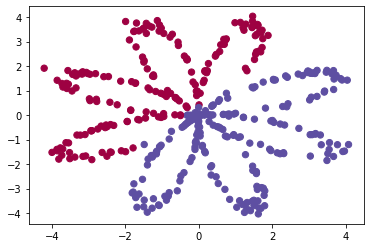

In [27]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 
model={}
model['linear']=nn_Linear(X.shape[0],hidden_state_size)
model['sigmoid']=nn_Sigmoid()
model['loss']=nn_MSECriterion()
model_h={}
model_h['linear']=nn_Linear(hidden_state_size,Y.shape[0])
model_h['sigmoid']=nn_Sigmoid()
# Define the 2-layer network here (fill in yout code)


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):   
        xi=X.T[i:i+1,:]
        yi=Y.T[i:i+1,:]
        
        # forward
        a0=model['linear'].forward(xi)
        a1=model['sigmoid'].forward(a0)
        a2=model_h['linear'].forward(a1)
        a3=model_h['sigmoid'].forward(a2)
        loss=loss+model['loss'].forward(a3,yi)

        #backward
        da3=model['loss'].backward(a3,yi)
        da2=model_h['sigmoid'].backward(a2,da3)
        da1=model_h['linear'].backward(a1,da2)
        da0=model['sigmoid'].backward(a0,da1)
        model['linear'].backward(xi,da0)

        model_h['linear'].weight=model_h['linear'].weight-learningRate*model_h['linear'].gradWeight
        model_h['linear'].bias=model_h['linear'].bias-learningRate*model_h['linear'].gradBias
        model['linear'].weight=model['linear'].weight-learningRate*model['linear'].gradWeight
        model['linear'].bias=model['linear'].bias-learningRate*model['linear'].gradBias     
        
    

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline
classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    xi=X.T[i:i+1,:]
    yi=Y.T[i:i+1,:]
        
        # forward
    a0=model['linear'].forward(xi)
    a1=model['sigmoid'].forward(a0)
    a2=model_h['linear'].forward(a1)
    a3=model_h['sigmoid'].forward(a2)
    y_hat=a3
      
    classEstimate[i,0] = (y_hat > 0.5)

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);


## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09241678
epoch[10] = 0.09781934
epoch[20] = 0.09767770
epoch[30] = 0.09701358
epoch[40] = 0.09573943
epoch[50] = 0.09489850
epoch[60] = 0.09418834
epoch[70] = 0.09302600
epoch[80] = 0.09118375
epoch[90] = 0.08916377
epoch[100] = 0.08757663
epoch[110] = 0.08648782
epoch[120] = 0.08575350
epoch[130] = 0.08519125
epoch[140] = 0.08453253
epoch[150] = 0.08319880
epoch[160] = 0.08016500
epoch[170] = 0.07492183
epoch[180] = 0.06883248
epoch[190] = 0.06351317
epoch[200] = 0.05939159
epoch[210] = 0.05629560
epoch[220] = 0.05395882
epoch[230] = 0.05216327
epoch[240] = 0.05075314
epoch[250] = 0.04962105
epoch[260] = 0.04869321
epoch[270] = 0.04791847
epoch[280] = 0.04726082
epoch[290] = 0.04669443


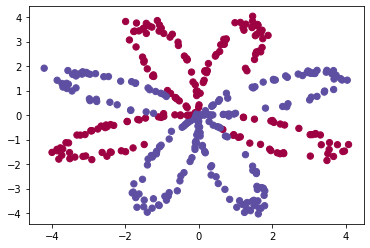

In [28]:
hidden_state_size = 5; 
model={}
model['linear']=nn_Linear(X.shape[0],hidden_state_size)
model['sigmoid']=nn_Sigmoid()
model['loss']=nn_MSECriterion()
model_h={}
model_h['linear']=nn_Linear(hidden_state_size,Y.shape[0])
model_h['sigmoid']=nn_Sigmoid()
# Define the 2-layer network here (fill in yout code)


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):   
        xi=X.T[i:i+1,:]
        yi=Y.T[i:i+1,:]
        
        # forward
        a0=model['linear'].forward(xi)
        a1=model['sigmoid'].forward(a0)
        a2=model_h['linear'].forward(a1)
        a3=model_h['sigmoid'].forward(a2)
        loss=loss+model['loss'].forward(a3,yi)

        #backward
        da3=model['loss'].backward(a3,yi)
        da2=model_h['sigmoid'].backward(a2,da3)
        da1=model_h['linear'].backward(a1,da2)
        da0=model['sigmoid'].backward(a0,da1)
        model['linear'].backward(xi,da0)

        model_h['linear'].weight=model_h['linear'].weight-learningRate*model_h['linear'].gradWeight
        model_h['linear'].bias=model_h['linear'].bias-learningRate*model_h['linear'].gradBias
        model['linear'].weight=model['linear'].weight-learningRate*model['linear'].gradWeight
        model['linear'].bias=model['linear'].bias-learningRate*model['linear'].gradBias     
        
    

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline
classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    xi=X.T[i:i+1,:]
    yi=Y.T[i:i+1,:]
        
        # forward
    a0=model['linear'].forward(xi)
    a1=model['sigmoid'].forward(a0)
    a2=model_h['linear'].forward(a1)
    a3=model_h['sigmoid'].forward(a2)
    y_hat=a3
      
    classEstimate[i,0] = (y_hat > 0.5)
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);
# Rest should be taken from above 

<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 

For hidden_layer=1, we actually implement a linear classifier, so there is a hyperplane to separate two classes of points. The loss function are not decrease much after serveral poches. When hidden units=5, the non-linearity of the data can be captured. So the two classes of points can be separated by non-linear boundaries.

# 4. PyTorch and Debugging [20 points].

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part you are given re-implementation of the dataset and neural network you worked with in Section 3 of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs. 

##4.1 Dataloader 

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below. 

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            #self.Y[ix] = random.randint(0, 1) 
            self.Y[ix]=j

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]
    
    def get_all_data(self):
      ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
      return self.X.T, self.Y.T


## 4.2 **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above. 

**Hint:** only one line needs changing in the dataloader. 

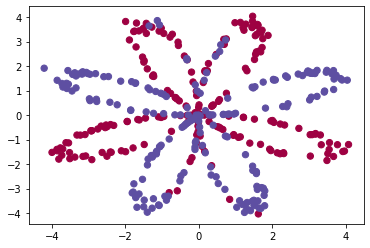

In [30]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 4.3 Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section 3, using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00453267
epoch[10] = 0.00429047
epoch[20] = 0.00409074
epoch[30] = 0.00400001
epoch[40] = 0.00391771
epoch[50] = 0.00367792
epoch[60] = 0.00333770
epoch[70] = 0.00283870
epoch[80] = 0.00254396
epoch[90] = 0.00227316
epoch[100] = 0.00217598
epoch[110] = 0.00214252
epoch[120] = 0.00205416
epoch[130] = 0.00217644
epoch[140] = 0.00205657
epoch[150] = 0.00205581
epoch[160] = 0.00191048
epoch[170] = 0.00192593
epoch[180] = 0.00205961
epoch[190] = 0.00195459
epoch[200] = 0.00186185
epoch[210] = 0.00178902
epoch[220] = 0.00181536
epoch[230] = 0.00188326
epoch[240] = 0.00170200
epoch[250] = 0.00177012
epoch[260] = 0.00174743
epoch[270] = 0.00182321
epoch[280] = 0.00178074
epoch[290] = 0.00175904


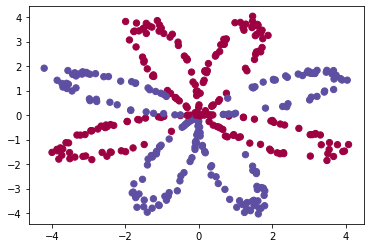

In [32]:
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.4 **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader. 

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174821
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


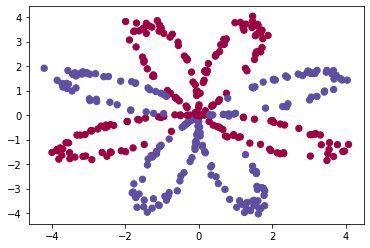

In [33]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


# Copy the code from Section 4.3 and modify accordingly
fix_seeds()
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.5 **Debugging Strategy 3:** Train with minimal amount of data 

It may still be difficult to identify what is wrong based on results in Section 4.4. A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section 4.4 in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be. 

epoch[0] = 0.00068058
epoch[10] = 0.00030390
epoch[20] = 0.00131019
epoch[30] = 0.00032860
epoch[40] = 0.00005312
epoch[50] = 0.00165202
epoch[60] = 0.00080430
epoch[70] = 0.00060629
epoch[80] = 0.00181441
epoch[90] = 0.00143599
epoch[100] = 0.00018204
epoch[110] = 0.00029026
epoch[120] = 0.00022328
epoch[130] = 0.00010590
epoch[140] = 0.00023623
epoch[150] = 0.00195786
epoch[160] = 0.00065150
epoch[170] = 0.00140774
epoch[180] = 0.00011558
epoch[190] = 0.00087862
epoch[200] = 0.00107872
epoch[210] = 0.00051158
epoch[220] = 0.00130950
epoch[230] = 0.00068605
epoch[240] = 0.00081271
epoch[250] = 0.00020601
epoch[260] = 0.00010529
epoch[270] = 0.00143381
epoch[280] = 0.00051528
epoch[290] = 0.00054094


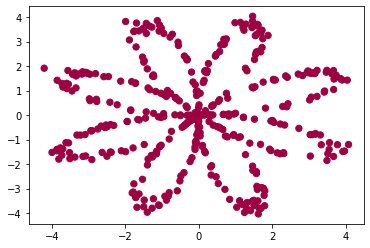

In [34]:
# Copy the code from Section 4.4 and modify to run with batch size of 1 and only one / same batch used in each epoch.

fix_seeds()
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True #correct here
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()
# Copy the code from Section 4.3 and modify accordingly

learning_rate = 0.1
num_epochs = 300
#batchsize=64 #batchsize
batchsize=1

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)


for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        if iter==0:
            input,target = data
        # We have to set gradients to zero at the start of every iteration
            optimizer.zero_grad() 
        
        # Forward pass through the model
            output = model(input)
        
            loss = MSELoss(output,target)
            running_loss += loss.item()
        
        # Backpropagation
            loss.backward()
            optimizer.step()

        #if iter>=1:
        #    break

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

%matplotlib inline
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174821
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


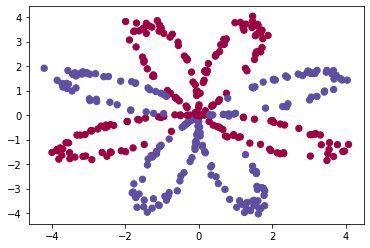

In [35]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section 3

def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)


# Copy the code from Section 4.3 and modify accordingly
fix_seeds()
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()


# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

     # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

    %matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))


start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 4.6 **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [36]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




epoch[0] = 0.00445044
epoch[10] = 0.00425069
epoch[20] = 0.00410612
epoch[30] = 0.00395750
epoch[40] = 0.00380322
epoch[50] = 0.00381829
epoch[60] = 0.00362503
epoch[70] = 0.00318312
epoch[80] = 0.00284260
epoch[90] = 0.00262447
epoch[100] = 0.00233605
epoch[110] = 0.00219482
epoch[120] = 0.00210903
epoch[130] = 0.00198819
epoch[140] = 0.00195605
epoch[150] = 0.00207218
epoch[160] = 0.00193985
epoch[170] = 0.00202940
epoch[180] = 0.00194622
epoch[190] = 0.00190108
epoch[200] = 0.00176547
epoch[210] = 0.00188485
epoch[220] = 0.00177002
epoch[230] = 0.00193592
epoch[240] = 0.00176917
epoch[250] = 0.00174821
epoch[260] = 0.00184171
epoch[270] = 0.00172306
epoch[280] = 0.00195291
epoch[290] = 0.00173516


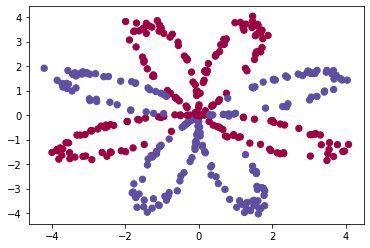

In [37]:
# Insert your code here
fix_seeds()
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
for param in linear1.parameters():  
    param.requires_grad = True
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()

model.eval()
classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

Now install the tensorboard!done

In [31]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


Now to start tensorboard in google colab we can run following command.

In [39]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 41030), started 0:00:07 ago. (Use '!kill 41030' to kill it.)